<a href="https://colab.research.google.com/github/sara-fuentes/tfm_pisa_educacion/blob/main/TFM_PISA_CLASIFICACI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pregunta de investigación**
¿Cómo influye la implicación a de padres y profesores en el rendimiento académico de los alumnos?



# Justificación

Esta pregunta busca explorar la relación entre la participación de los padres y profesores en el proceso educativo y su efecto en el desempeño académico de los estudiantes, utilizando un enfoque analítico basado en datos cuantitativos y cualitativos.

# Target:
Rendimiento académico de los estudiantes de España (PISA 2022)

In [1]:
###¿Cómo construímos esa columna?

Variables que podrían en conjunto ser ese target:


###A continuación se muestran las variables que podrían ayudar a definir el concepto de IMPLICACIÓN.

In [2]:
###¿Cuantas variables necesitamos para construir un modelo sólido de predicción del rendimiento escolar según la implicación parental?
## ¿Basta con una? ¿Hay mínimo o máximo?

# Variables (Ejemplo Cuestionario Wellbeing)


   
*WB155
*WB155Q08HA Your relationship with your parents/guardians
*WB155Q09HA Your relationship with your teachers

*WB162: How easy is it for you to talk to the following people about things that really bother you?

*WB163 Thinking about your parents or guardians, how often do they do each of the following?

WB163Q01HA Help me as much as I need
WB163Q02HA Let me do the things I like doing
WB163Q03HA Show that they care
WB163Q04HA Try to understand my problems and worries
WB163Q05HA Encourage me to make my own decisions
WB163Q06HA Try to control everything I do
WB163Q07HA Treat me like a baby
WB163Q08HA Make me feel better when I am upset

WB164 How often do you worry about how much money your family has?

# Variables (Ejemplo Cuestionario Parents)

PA003Q01TA Discuss how well my child is doing at school
PA003Q18WA Help my child with his/her mathematics homework
PA003Q05IA Discuss political or social issues with my child
PA003Q20WA Discuss with my child how mathematics can be applied in everyday life
PA003Q12JA Talk to my child about any problems he/she may have at school

Q05
PA008
During <the last academic year>, have you participated
in any of the following school-related activities?

PA185Q01JA
In our family, we encourage participating in extracurricular activities that require creativity.

Q25
PA041
In the last twelve months, about how much have you
paid to educational providers for services?


#Variables (Ejemplo Cuestionario Students)

PARENTS
ST300 How often do your parents or someone in your family do the following things with you?
ST300Q01JA Discuss how well you are doing at school.
ST300Q02JA Eat the main meal with you.
ST300Q03JA Spend time just talking with you.
ST300Q04JA Talk to you about the importance of completing ISCED 3
ST300Q07JA Encourage you to get good marks
ST300Q08JA Take an interest in what you are
learning at school.
ST300Q09JA Talk to you about your future
education.
ST300Q10JA Ask you what you did in school that day.

TEACHERS

ST267Q01JA The teachers at my school are respectful towards me.
ST267Q02JA If I walked into my classes upset, my teachers would be concerned about me.
ST267Q03JA If I came back to visit my school three years from now, my teachers would be excited to see me.
ST267Q04JA I feel intimidated by the teachers at my school.
ST267Q05JA When my teachers ask how I am doing, they are really interested in my answer.
ST267Q06JA The teachers at my school are friendly towards me.
ST267Q07JA The teachers at my school are interested in students' well-being.
ST267Q08JA The teachers at my school are mean towards me.

ST335Q01JA My teachers give me enough time to come up with creative solutions on
assignments.
ST335Q02JA My teachers value students’ creativity.
ST335Q06JA My teachers encourage me to come up
with original answers.
ST354Q03JA My teachers were available when I needed help (e.g. through virtual
office hours, email, chat). [CONTEXTO COVID]
ST354Q08JA My teachers were well prepared to provide instruction remotely. [CONTEXTO COVID]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#!pip install --no-cache-dir numpy==1.26.4 scipy==1.11.4 scikit-learn==1.3.2 pandas==2.0.3
!pip install pyreadstat
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.7/617.7 kB 8.7 MB/s eta 0:00:00


In [5]:
!pip install catboost
!pip install matplotlib-venn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.3 MB/s eta 0:00:00


In [6]:
! pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.5/720.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.

In [7]:
! pip install pyngrok

In [8]:
# import mlflow
# mlflow.set_tracking_uri("file:///content/mlflow")

In [9]:
import os
import subprocess

# Run the MLflow UI as a background process
# mlflow_ui_cmd = "mlflow ui --port 5000 --backend-store-uri file:///content/mlflow"
# process = subprocess.Popen(mlflow_ui_cmd.split(), stdout=subprocess.PIPE)

In [10]:
from pyngrok import ngrok

# Replace 'YOUR_TOKEN_HERE' with your actual authtoken
# ngrok.set_auth_token("2xTOWxKLSvkJxZiIv7yflxZbTZG_3AFfbcSSQfSbbFmeA5QXT")

# Open an HTTP tunnel on port 5000 (MLflow's default UI port)
# public_url = ngrok.connect(addr="http://localhost:5000")
# print(f"MLflow UI available at: {public_url}")

In [11]:
# Now you can import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pyreadstat
import mlflow

#from sklearn.preprocessing import StandardScaler #Check to see if this imports without errors now.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import shap
import warnings
import os

warnings.filterwarnings("ignore")
np.random.seed(25)

In [13]:
# df_students_spain= pd.read_csv("/content/drive/MyDrive/DataScience/Copia de df_students_num_485.csv") # gerardo
# compendio = pd.read_excel('/content/drive/MyDrive/DataScience/TFM/compendio_df_students.xlsx') # gerardo

df_students_spain= pd.read_csv("/content/drive/MyDrive/Data Science and AI/classification_model/df_students_num_485.csv") # sara
compendio = pd.read_excel('/content/drive/MyDrive/Data Science and AI/classification_model/compendio_df_students.xlsx') # sara

In [14]:
# local colab directory for mlflow (poner una carpeta de colab donde
# mlflow va a guardar los logs durante una sesion)
mlflow.set_tracking_uri("/content/drive/MyDrive/Data Science and AI/Calidad Educativa España/mlruns")


# Exploración de datos

In [15]:
df_students_spain.head(5)

,ST267Q01JA,ST267Q02JA,ST267Q03JA,ST267Q04JA,ST267Q05JA,ST267Q06JA,ST267Q07JA,ST267Q08JA,ST270Q01JA,ST270Q02JA,...,WB155Q09HA,WB163Q01HA,WB163Q02HA,WB163Q03HA,WB163Q04HA,WB163Q05HA,WB163Q06HA,WB163Q07HA,WB163Q08HA,aprobado
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2.0,1.0,NaN,NaN,2.0,3.0,2.0,NaN,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0
2,NaN,2.0,2.0,NaN,2.0,2.0,NaN,1.0,1.0,1.0,...,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,0.0
3,2.0,1.0,2.0,0.0,NaN,NaN,2.0,NaN,3.0,3.0,...,2.0,2.0,1.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0
4,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0


In [16]:
df_students_spain.isnull().sum()

,0
ST267Q01JA,12284
ST267Q02JA,12397
ST267Q03JA,12336
ST267Q04JA,12422
ST267Q05JA,12255
ST267Q06JA,12517
ST267Q07JA,12419
ST267Q08JA,12250
ST270Q01JA,1994
ST270Q02JA,2054


In [17]:
column_list = df_students_spain.columns.tolist()
print(column_list)

['ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA', 'ST267Q06JA', 'ST267Q07JA', 'ST267Q08JA', 'ST270Q01JA', 'ST270Q02JA', 'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA', 'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA', 'ST300Q07JA', 'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA', 'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA', 'ST353Q07JA', 'ST353Q08JA', 'WB155Q08HA', 'WB155Q09HA', 'WB163Q01HA', 'WB163Q02HA', 'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA', 'WB163Q08HA', 'aprobado']


In [18]:
column_list = df_students_spain.columns.tolist()

for idx, column in enumerate(column_list):
    print(f"{idx}: {column}")

0: ST267Q01JA
1: ST267Q02JA
2: ST267Q03JA
3: ST267Q04JA
4: ST267Q05JA
5: ST267Q06JA
6: ST267Q07JA
7: ST267Q08JA
8: ST270Q01JA
9: ST270Q02JA
10: ST270Q03JA
11: ST270Q04JA
12: ST297Q01JA
13: ST300Q01JA
14: ST300Q02JA
15: ST300Q03JA
16: ST300Q04JA
17: ST300Q05JA
18: ST300Q06JA
19: ST300Q07JA
20: ST300Q08JA
21: ST300Q09JA
22: ST300Q10JA
23: ST348Q04JA
24: ST348Q08JA
25: ST353Q01JA
26: ST353Q02JA
27: ST353Q05JA
28: ST353Q06JA
29: ST353Q07JA
30: ST353Q08JA
31: WB155Q08HA
32: WB155Q09HA
33: WB163Q01HA
34: WB163Q02HA
35: WB163Q03HA
36: WB163Q04HA
37: WB163Q05HA
38: WB163Q06HA
39: WB163Q07HA
40: WB163Q08HA
41: aprobado


In [19]:
# definimos una función que reciba un código y devuelva su significado

def obtener_significado(codigo, df_compendio):
    resultado = df_compendio.loc[df_compendio['Sigla'] == codigo, 'Explicacion']
    return resultado.iloc[0] if not resultado.empty else "Not found"

In [20]:
obtener_significado('CNT', compendio)

'Country'

## Selección de variables
Procedemos a una selección más cuidadosa de las columnas que vamos a usar para nuestro modelo. En este caso,todas estas columnas son exactamente las que tenemos en el dataset, pero de todas formas mantenemos su selección por si subimos otros  dataset

In [21]:
# lista de variables seleccionadas:

preguntas_seleccionadas = ['ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA', 'ST267Q06JA', 'ST267Q07JA', 'ST267Q07JA', 'ST270Q01JA',
             'ST270Q02JA', 'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA', 'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA',
             'ST300Q07JA', 'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA', 'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA',
             'ST353Q07JA', 'ST353Q08JA', 'WB155Q08HA', 'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA', 'WB163Q08HA',
             'WB155Q09HA', 'WB163Q01HA', 'WB163Q02HA']

In [22]:
# comprobar que todas las variables están en el dataset

variables_no_encontradas = []
for i in preguntas_seleccionadas:
    if i not in df_students_spain.columns:
        variables_no_encontradas.append(i)
        print(i)

In [23]:
# invertir columna aprobado

df_students_spain['aprobado'] = df_students_spain['aprobado'].map({0: 1, 1: 0})

In [24]:
# renombrar aprobado a suspendido

df_students_spain.rename(columns={'aprobado': 'suspendido'}, inplace=True)

## unión código - pregunta

In [25]:
for column in df_students_spain.columns:
    print(column + ': ' + str(obtener_significado(column, compendio)))

ST267Q01JA: Agree/disagree: The teachers at my school are respectful towards me.
ST267Q02JA: Agree/disagree: If I walked into my classes upset, my teachers would be concerned about me.
ST267Q03JA: Agree/disagree: If I came back to visit my school 3 years from now, my teachers would be excited to see me.
ST267Q04JA: Agree/disagree: I feel intimidated by the teachers at my school.
ST267Q05JA: Agree/disagree: When my teachers ask how I am doing, they are really interested in my answer.
ST267Q06JA: Agree/disagree: The teachers at my school are friendly towards me.
ST267Q07JA: Agree/disagree: The teachers at my school are interested in students' well-being.
ST267Q08JA: Agree/disagree: The teachers at my school are mean towards me.
ST270Q01JA: How often: The teacher shows an interest in every student's learning.
ST270Q02JA: How often: The teacher gives extra help when students need it.
ST270Q03JA: How often: The teacher helps students with their learning.
ST270Q04JA: How often: The teacher c

#Feature ingeneering

In [26]:
df_students_clean = df_students_spain.copy()

In [27]:
#ST267: Crear nueva variable que agrupe las siguientes en vinculo_teachers. El valor puede ser la moda o 0.

# Lista de columnas relevantes
columns_vinculo = [
    'ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA',
    'ST267Q05JA', 'ST267Q06JA', 'ST267Q07JA', 'ST267Q08JA'
]

# Crear la nueva columna calculando solo los valores presentes, ignorando NaNs
df_students_clean['vinculo_teach'] = df_students_clean[columns_vinculo].mean(axis=1, skipna=True)

In [28]:
#WB163: Crear nueva variable que agrupe las siguientes en parents_support. El valor puede ser la moda o 0.

# Lista de columnas relevantes
columns_vinculo = [
    'WB163Q01HA', 'WB163Q02HA', 'WB163Q03HA', 'WB163Q04HA',
    'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA', 'WB163Q08HA'
]

# Crear la nueva columna calculando solo los valores presentes, ignorando NaNs
df_students_clean['pa_supp'] = df_students_clean[columns_vinculo].mean(axis=1, skipna=True)

#Reetiquetado

In [29]:
nombres_antiguos = [
    'ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA',
    'ST267Q06JA', 'ST267Q07JA', 'ST267Q08JA', 'ST270Q01JA', 'ST270Q02JA',
    'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA',
    'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA', 'ST300Q07JA',
    'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA',
    'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA', 'ST353Q07JA',
    'ST353Q08JA', 'WB155Q08HA', 'WB155Q09HA', 'WB163Q01HA', 'WB163Q02HA',
    'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA',
    'WB163Q08HA'
]

# Lista de nuevos nombres (puedes personalizarlos)
nombres_nuevos = [
    'T_RESPECT', 'T_CONCERN', 'T_EXCITED', 'T_INTIMIDATE', 'T_INTEREST',
    'T_FRIENDLY', 'T_WELLBEING', 'T_MEAN', 'T_INT_LEARNING', 'T_EXTRA_HELP',
    'T_HELP_LEARNING', 'T_UNTIL_UNDERSTAND', 'TUTOR_MATH_1ON1', 'FAM_SCHOOL_PROGRESS', 'FAM_MEAL_TOGETHER',
    'FAM_TALK_TIME', 'FAM_COMPLETE_ISCED3', 'FAM_SCHOOL_PROBLEMS', 'FAM_PEER_RELATIONSHIPS', 'FAM_ENCOURAGE_MARKS',
    'FAM_INTEREST_LEARNING', 'FAM_FUTURE_EDUCATION', 'FAM_SCHOOL_DAY_RECAP', 'COVID_CHECK_ASSIGNMENTS', 'COVID_CHECK_FEELINGS',
    'COVID_FAM_HELP_SCHOOLWORK', 'COVID_FAM_ASK_LEARNING', 'COVID_FAM_CHECK_ASSIGNMENTS', 'COVID_FAM_EXPLAIN_CONTENT', 'COVID_FAM_FIND_RESOURCES',
    'COVID_FAM_TEACH_EXTRA', 'SATISF_REL_PARENTS', 'SATISF_REL_TEACHERS', 'FAM_HELP_ENOUGH', 'FAM_LET_DO_LIKES',
    'FAM_SHOW_CARE', 'FAM_UNDERSTAND_PROBS', 'FAM_ENCOURAGE_DECISIONS', 'FAM_CONTROL_EVERYTHING', 'FAM_TREAT_BABY',
    'FAM_COMFORT_UPSET'
]

# Crear un diccionario de renombrado
renombrar_dict = dict(zip(nombres_antiguos, nombres_nuevos))

# Cambiar los nombres de las columnas
df_students_clean.rename(columns=renombrar_dict, inplace=True)

# Verificar el cambio
print(df_students_clean.head())

   T_RESPECT  T_CONCERN  T_EXCITED  T_INTIMIDATE  T_INTEREST  T_FRIENDLY  \
0        NaN        NaN        NaN           NaN         NaN         NaN   
1        2.0        1.0        NaN           NaN         2.0         3.0   
2        NaN        2.0        2.0           NaN         2.0         2.0   
3        2.0        1.0        2.0           0.0         NaN         NaN   
4        NaN        0.0        0.0           NaN         0.0         0.0   

   T_WELLBEING  T_MEAN  T_INT_LEARNING  T_EXTRA_HELP  ...  FAM_LET_DO_LIKES  \
0          NaN     NaN             NaN           NaN  ...               NaN   
1          2.0     NaN             1.0           1.0  ...               2.0   
2          NaN     1.0             1.0           1.0  ...               1.0   
3          2.0     NaN             3.0           3.0  ...               1.0   
4          NaN     2.0             2.0           2.0  ...               2.0   

   FAM_SHOW_CARE  FAM_UNDERSTAND_PROBS  FAM_ENCOURAGE_DECISIONS  \
0

In [30]:
df_students_clean.columns

Index(['T_RESPECT', 'T_CONCERN', 'T_EXCITED', 'T_INTIMIDATE', 'T_INTEREST',
       'T_FRIENDLY', 'T_WELLBEING', 'T_MEAN', 'T_INT_LEARNING', 'T_EXTRA_HELP',
       'T_HELP_LEARNING', 'T_UNTIL_UNDERSTAND', 'TUTOR_MATH_1ON1',
       'FAM_SCHOOL_PROGRESS', 'FAM_MEAL_TOGETHER', 'FAM_TALK_TIME',
       'FAM_COMPLETE_ISCED3', 'FAM_SCHOOL_PROBLEMS', 'FAM_PEER_RELATIONSHIPS',
       'FAM_ENCOURAGE_MARKS', 'FAM_INTEREST_LEARNING', 'FAM_FUTURE_EDUCATION',
       'FAM_SCHOOL_DAY_RECAP', 'COVID_CHECK_ASSIGNMENTS',
       'COVID_CHECK_FEELINGS', 'COVID_FAM_HELP_SCHOOLWORK',
       'COVID_FAM_ASK_LEARNING', 'COVID_FAM_CHECK_ASSIGNMENTS',
       'COVID_FAM_EXPLAIN_CONTENT', 'COVID_FAM_FIND_RESOURCES',
       'COVID_FAM_TEACH_EXTRA', 'SATISF_REL_PARENTS', 'SATISF_REL_TEACHERS',
       'FAM_HELP_ENOUGH', 'FAM_LET_DO_LIKES', 'FAM_SHOW_CARE',
       'FAM_UNDERSTAND_PROBS', 'FAM_ENCOURAGE_DECISIONS',
       'FAM_CONTROL_EVERYTHING', 'FAM_TREAT_BABY', 'FAM_COMFORT_UPSET',
       'suspendido', 'vinculo_teach

In [31]:
df_students_clean.tail()

,T_RESPECT,T_CONCERN,T_EXCITED,T_INTIMIDATE,T_INTEREST,T_FRIENDLY,T_WELLBEING,T_MEAN,T_INT_LEARNING,T_EXTRA_HELP,...,FAM_LET_DO_LIKES,FAM_SHOW_CARE,FAM_UNDERSTAND_PROBS,FAM_ENCOURAGE_DECISIONS,FAM_CONTROL_EVERYTHING,FAM_TREAT_BABY,FAM_COMFORT_UPSET,suspendido,vinculo_teach,pa_supp
30795,3.0,NaN,3.0,0.0,2.0,NaN,3.0,NaN,3.0,3.0,...,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1,2.2,1.75
30796,NaN,1.0,NaN,0.0,NaN,2.0,3.0,0.0,3.0,3.0,...,0.0,1.0,1.0,0.0,2.0,2.0,1.0,1,1.2,1.00
30797,2.0,NaN,3.0,NaN,3.0,3.0,NaN,0.0,2.0,3.0,...,2.0,2.0,1.0,2.0,1.0,1.0,1.0,0,2.2,1.50
30798,2.0,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.8,1.00
30799,NaN,NaN,NaN,1.0,2.0,3.0,2.0,0.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0,1.6,1.50


In [32]:
#Nos aseguramos que todos los registros de la target sean binarios
df_students_clean['suspendido'].unique()

array([1, 0])

In [33]:
# Configurar pandas para que no trunque la salida
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Calcular número y porcentaje de nulos
nulos_info = pd.DataFrame({
    'Número de Nulos': df_students_clean.isnull().sum(),
    'Porcentaje de Nulos (%)': df_students_clean.isnull().mean() * 100
})

# Imprimir resultado
print(nulos_info)

                             Número de Nulos  Porcentaje de Nulos (%)
T_RESPECT                              12284                39.883117
T_CONCERN                              12397                40.250000
T_EXCITED                              12336                40.051948
T_INTIMIDATE                           12422                40.331169
T_INTEREST                             12255                39.788961
T_FRIENDLY                             12517                40.639610
T_WELLBEING                            12419                40.321429
T_MEAN                                 12250                39.772727
T_INT_LEARNING                          1994                 6.474026
T_EXTRA_HELP                            2054                 6.668831
T_HELP_LEARNING                         2044                 6.636364
T_UNTIL_UNDERSTAND                      2031                 6.594156
TUTOR_MATH_1ON1                         1394                 4.525974
FAM_SCHOOL_PROGRESS 

In [34]:
# revisar

for column in preguntas_seleccionadas:
    print(f"{column}: {obtener_significado(column, compendio)}")

ST267Q01JA: Agree/disagree: The teachers at my school are respectful towards me.
ST267Q02JA: Agree/disagree: If I walked into my classes upset, my teachers would be concerned about me.
ST267Q03JA: Agree/disagree: If I came back to visit my school 3 years from now, my teachers would be excited to see me.
ST267Q04JA: Agree/disagree: I feel intimidated by the teachers at my school.
ST267Q05JA: Agree/disagree: When my teachers ask how I am doing, they are really interested in my answer.
ST267Q06JA: Agree/disagree: The teachers at my school are friendly towards me.
ST267Q07JA: Agree/disagree: The teachers at my school are interested in students' well-being.
ST267Q07JA: Agree/disagree: The teachers at my school are interested in students' well-being.
ST270Q01JA: How often: The teacher shows an interest in every student's learning.
ST270Q02JA: How often: The teacher gives extra help when students need it.
ST270Q03JA: How often: The teacher helps students with their learning.
ST270Q04JA: How o

## Eliminación de registros
Por el momento, no eliminaremos registros, pero si dejaremos el codigo por si necesitamos hacer el ejercicio en algun momento

In [35]:
#Contar los valores nulos en cada fila
#nulos_por_fila = df_students_clean.isnull().sum(axis=1)

# Contar cuántas filas tienen al menos 22 valores nulos
#filas_con_nulos = (nulos_por_fila >= 22).sum()

# Mostrar el resultado
#print(f'Número de filas con al menos 22 valores nulos: {filas_con_nulos}')

In [36]:
# Filtrar las filas que tienen AL menos de 18 valores nulos
#df_students_clean = df_students_clean[nulos_por_fila < 22]



In [37]:
# Calcular número y porcentaje de nulos
nulos_info = pd.DataFrame({
    'Número de Nulos': df_students_clean.isnull().sum(),
    'Porcentaje de Nulos (%)': df_students_clean.isnull().mean() * 100
})

# Imprimir resultado
print(nulos_info)

                             Número de Nulos  Porcentaje de Nulos (%)
T_RESPECT                              12284                39.883117
T_CONCERN                              12397                40.250000
T_EXCITED                              12336                40.051948
T_INTIMIDATE                           12422                40.331169
T_INTEREST                             12255                39.788961
T_FRIENDLY                             12517                40.639610
T_WELLBEING                            12419                40.321429
T_MEAN                                 12250                39.772727
T_INT_LEARNING                          1994                 6.474026
T_EXTRA_HELP                            2054                 6.668831
T_HELP_LEARNING                         2044                 6.636364
T_UNTIL_UNDERSTAND                      2031                 6.594156
TUTOR_MATH_1ON1                         1394                 4.525974
FAM_SCHOOL_PROGRESS 

# Alta Correlación

,T_RESPECT,T_CONCERN,T_EXCITED,T_INTIMIDATE,T_INTEREST,T_FRIENDLY,T_WELLBEING,T_MEAN,T_INT_LEARNING,T_EXTRA_HELP,T_HELP_LEARNING,T_UNTIL_UNDERSTAND,TUTOR_MATH_1ON1,FAM_SCHOOL_PROGRESS,FAM_MEAL_TOGETHER,FAM_TALK_TIME,FAM_COMPLETE_ISCED3,FAM_SCHOOL_PROBLEMS,FAM_PEER_RELATIONSHIPS,FAM_ENCOURAGE_MARKS,FAM_INTEREST_LEARNING,FAM_FUTURE_EDUCATION,FAM_SCHOOL_DAY_RECAP,COVID_CHECK_ASSIGNMENTS,COVID_CHECK_FEELINGS,COVID_FAM_HELP_SCHOOLWORK,COVID_FAM_ASK_LEARNING,COVID_FAM_CHECK_ASSIGNMENTS,COVID_FAM_EXPLAIN_CONTENT,COVID_FAM_FIND_RESOURCES,COVID_FAM_TEACH_EXTRA,SATISF_REL_PARENTS,SATISF_REL_TEACHERS,FAM_HELP_ENOUGH,FAM_LET_DO_LIKES,FAM_SHOW_CARE,FAM_UNDERSTAND_PROBS,FAM_ENCOURAGE_DECISIONS,FAM_CONTROL_EVERYTHING,FAM_TREAT_BABY,FAM_COMFORT_UPSET,suspendido,vinculo_teach,pa_supp
T_RESPECT,1.000000,0.408854,0.407588,-0.204616,0.416082,0.584547,0.487838,-0.421900,0.254856,0.242452,0.276197,0.232650,-0.044606,0.166136,0.140700,0.165614,0.090409,0.142352,0.131619,0.146025,0.158207,0.118042,0.136972,0.112770,0.091587,0.018577,0.117837,0.048242,0.006465,0.011916,0.039132,0.153036,0.362931,0.174086,0.135144,0.160882,0.147240,0.129549,-0.035404,-0.083664,0.132476,-0.158559,0.612539,0.147656
T_CONCERN,0.408854,1.000000,0.432823,-0.124177,0.551743,0.408590,0.536564,-0.210244,0.251360,0.244478,0.250106,0.225181,-0.005610,0.151854,0.069449,0.138371,0.098225,0.171136,0.169423,0.152895,0.184729,0.136251,0.114197,0.162917,0.191644,0.074397,0.106024,0.066758,0.095874,0.127862,0.088596,0.166134,0.346473,0.186247,0.111829,0.165946,0.196698,0.141168,-0.003680,-0.041005,0.205410,-0.002011,0.703911,0.191415
T_EXCITED,0.407588,0.432823,1.000000,-0.117773,0.435425,0.414072,0.377189,-0.247721,0.190760,0.173750,0.189203,0.170781,-0.014508,0.171858,0.125404,0.165756,0.095933,0.141595,0.152884,0.169696,0.166960,0.137659,0.151328,0.124262,0.111757,0.056606,0.114383,0.041343,0.051655,0.053833,0.074801,0.146104,0.327188,0.161942,0.103318,0.158016,0.142737,0.121671,-0.000659,-0.044853,0.146238,-0.104409,0.637471,0.156145
T_INTIMIDATE,-0.204616,-0.124177,-0.117773,1.000000,-0.165922,-0.240147,-0.210409,0.368199,-0.144974,-0.140600,-0.156535,-0.150147,0.031591,-0.049563,-0.070752,-0.071371,-0.026719,-0.071215,-0.046725,-0.064417,-0.089928,-0.074916,-0.037927,-0.039589,-0.075478,-0.010208,-0.038380,-0.002585,-0.013252,-0.027916,-0.023830,-0.123090,-0.195847,-0.092879,-0.066714,-0.079815,-0.095561,-0.069286,0.032387,0.066192,-0.088985,-0.015950,0.209855,-0.075547
T_INTEREST,0.416082,0.551743,0.435425,-0.165922,1.000000,0.438019,0.555602,-0.262955,0.260880,0.245344,0.252992,0.227411,-0.011364,0.166401,0.101463,0.160149,0.130195,0.185446,0.181767,0.177864,0.209764,0.177395,0.131414,0.153623,0.179724,0.076333,0.122268,0.063710,0.093902,0.084577,0.075385,0.184868,0.354211,0.200441,0.134194,0.180081,0.201065,0.151118,-0.024699,-0.077745,0.200516,-0.043580,0.690002,0.189411
T_FRIENDLY,0.584547,0.408590,0.414072,-0.240147,0.438019,1.000000,0.540761,-0.429234,0.253441,0.240866,0.267337,0.234686,-0.035715,0.150791,0.125327,0.143714,0.084999,0.141508,0.127717,0.133649,0.152487,0.124675,0.128710,0.118020,0.119496,0.037829,0.095897,0.044182,0.016831,0.042603,0.028150,0.162415,0.395372,0.148147,0.125174,0.130238,0.133357,0.124543,-0.045552,-0.078669,0.128299,-0.105359,0.613782,0.128171
T_WELLBEING,0.487838,0.536564,0.377189,-0.210409,0.555602,0.540761,1.000000,-0.333831,0.302366,0.288968,0.305136,0.267826,-0.020538,0.130323,0.092200,0.130008,0.093950,0.154374,0.153821,0.174099,0.199279,0.141442,0.115079,0.152102,0.184072,0.039134,0.084918,0.053873,0.065213,0.072702,0.066886,0.156916,0.370272,0.169095,0.101439,0.166425,0.183616,0.140774,-0.009312,-0.059419,0.163764,-0.042474,0.676513,0.167225
T_MEAN,-0.421900,-0.210244,-0.247721,0.368199,-0.262955,-0.429234,-0.333831,1.000000,-0.218703,-0.216416,-0.230457,-0.204929,0.056571,-0.136680,-0.107910,-0.134711,-0.034947,-0.095565,-0.092972,-0.106456,-0.117625,-0.064382,-0.127148,-0.055750,-0.029601,-0.006679,-0.085572,-0.021636,0.006117,0.0138

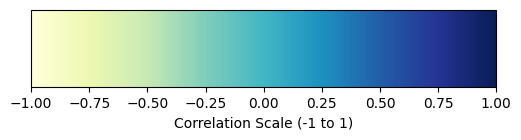

In [38]:
# Definir la matriz de correlación
df_corr = df_students_clean.corr(numeric_only=True)

# Visualizamos la matriz de correlación como DataFrame
styled_corr = df_corr.style.background_gradient(cmap='YlGnBu').set_caption("Correlation Matrix")

# Visualizamos el DataFrame
display(styled_corr)

# Dividimos por colores
fig, ax = plt.subplots(figsize=(6, 1))
cmap = plt.get_cmap('YlGnBu')
norm = plt.Normalize(vmin=-1, vmax=1)
cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')
cb.set_label('Correlation Scale (-1 to 1)')
plt.show()

In [39]:
df_students_clean.head()


,T_RESPECT,T_CONCERN,T_EXCITED,T_INTIMIDATE,T_INTEREST,T_FRIENDLY,T_WELLBEING,T_MEAN,T_INT_LEARNING,T_EXTRA_HELP,T_HELP_LEARNING,T_UNTIL_UNDERSTAND,TUTOR_MATH_1ON1,FAM_SCHOOL_PROGRESS,FAM_MEAL_TOGETHER,FAM_TALK_TIME,FAM_COMPLETE_ISCED3,FAM_SCHOOL_PROBLEMS,FAM_PEER_RELATIONSHIPS,FAM_ENCOURAGE_MARKS,FAM_INTEREST_LEARNING,FAM_FUTURE_EDUCATION,FAM_SCHOOL_DAY_RECAP,COVID_CHECK_ASSIGNMENTS,COVID_CHECK_FEELINGS,COVID_FAM_HELP_SCHOOLWORK,COVID_FAM_ASK_LEARNING,COVID_FAM_CHECK_ASSIGNMENTS,COVID_FAM_EXPLAIN_CONTENT,COVID_FAM_FIND_RESOURCES,COVID_FAM_TEACH_EXTRA,SATISF_REL_PARENTS,SATISF_REL_TEACHERS,FAM_HELP_ENOUGH,FAM_LET_DO_LIKES,FAM_SHOW_CARE,FAM_UNDERSTAND_PROBS,FAM_ENCOURAGE_DECISIONS,FAM_CONTROL_EVERYTHING,FAM_TREAT_BABY,FAM_COMFORT_UPSET,suspendido,vinculo_teach,pa_supp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1,2.0,1.0,NaN,NaN,2.0,3.0,2.0,NaN,1.0,1.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0,2.0,1.50
2,NaN,2.0,2.0,NaN,2.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,4.0,NaN,4.0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,3.0,1.0,3.0,NaN,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,1,1.8,1.25
3,2.0,1.0,2.0,0.0,NaN,NaN,2.0,NaN,3.0,3.0,3.0,3.0,0.0,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,1.0,NaN,3.0,3.0,0.0,2.0,0.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,1.0,2.0,1,1.4,1.50
4,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,2.0,2.0,3.0,1.0,4.0,4.0,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,2.0,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0,0.4,1.50


In [40]:
# Creamos un dataframe triangulo de las correlaciones para evitar que se repitan los valores
df_triangulo = pd.DataFrame(np.triu(df_corr, k=1), columns=df_students_clean.columns)
df_triangulo.index = df_students_clean.columns
#df_triangulo

Como vemos en la matriz, no hay correlaciones que superen el umbral del 0.9 que es el umbral aceptable para la eliminación de estas. Dejamos el codigo para futuros ejercicios

In [41]:
# Seleccionamos los pares de variables cuya correlación absoluta supere el umbral de 0.9
df_altas_correlaciones = df_triangulo.stack().reset_index()
df_altas_correlaciones.columns = ['variable1', 'variable2', 'correlacion']
df_altas_correlaciones = df_altas_correlaciones[df_altas_correlaciones['correlacion'].abs() > 0.9]
df_altas_correlaciones.head(5)

,variable1,variable2,correlacion


In [42]:
# Sacamos las correlaciones de las variables con la target
corr_con_target = df_students_clean.corr()['suspendido']
corr_con_target

,suspendido
T_RESPECT,-0.158559
T_CONCERN,-0.002011
T_EXCITED,-0.104409
T_INTIMIDATE,-0.015950
T_INTEREST,-0.043580
T_FRIENDLY,-0.105359
T_WELLBEING,-0.042474
T_MEAN,0.142658
T_INT_LEARNING,-0.037563
T_EXTRA_HELP,-0.015688


# Baja Varianza

In [43]:
varianza= df_students_clean.var()
# Encontrar la columna con la varianza más alta
columna_max_varianza = varianza.idxmax()
valor_max_varianza = varianza.max()
# Encontrar la columna con la varianza más baja
columna_min_varianza = varianza.idxmin()
valor_min_varianza = varianza.min()
# Mostrar resultados
print(f'Columna con la mayor varianza: {columna_max_varianza}')
print(f'Valor de la varianza: {valor_max_varianza}')
print(f'Columna con la menor varianza: {columna_min_varianza}')
print(f'Valor de la menor varianza: {valor_min_varianza}')

Columna con la mayor varianza: FAM_PEER_RELATIONSHIPS
Valor de la varianza: 2.374069866920037
Columna con la menor varianza: TUTOR_MATH_1ON1
Valor de la menor varianza: 0.14585466151471918


In [44]:
varianza.sort_values()

,0
TUTOR_MATH_1ON1,0.145855
pa_supp,0.154309
vinculo_teach,0.215708
suspendido,0.249805
FAM_SHOW_CARE,0.294834
FAM_LET_DO_LIKES,0.347248
FAM_HELP_ENOUGH,0.349069
T_FRIENDLY,0.404462
FAM_ENCOURAGE_DECISIONS,0.416619
FAM_UNDERSTAND_PROBS,0.449127


In [45]:
var_poca_varianza = []
print('baja varianza:')

for col in df_students_clean.columns:
  if df_students_clean[col].var() < 0.01:
    print(col, df_students_clean[col].var())
    var_poca_varianza.append(col)
print('eliminar', var_poca_varianza)
print('cantidad', len(var_poca_varianza))

baja varianza:
eliminar []
cantidad 0


# Modelado

## Split Train-Test

In [46]:
# Definir las características (X) y la variable objetivo (y)
X = df_students_clean.drop('suspendido', axis=1)
y = df_students_clean['suspendido']

In [47]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
print('nº observaciones de train:', len(y_train))
print('nº observaciones de test: ', len(y_test))

nº observaciones de train: 21560
nº observaciones de test:  9240


#Imputacion

In [49]:
# 1. Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Imputar (solo fit con X_train escalado)
imputer = KNNImputer(n_neighbors=5, weights='distance')
X_train_imputed_scaled = imputer.fit_transform(X_train_scaled)
X_test_imputed_scaled = imputer.transform(X_test_scaled)

# 3. Revertir la normalización (inverso del escalado)
X_train_imputed = scaler.inverse_transform(X_train_imputed_scaled)
X_test_imputed = scaler.inverse_transform(X_test_imputed_scaled)

# 4. Opcional: volver a convertir a DataFrame con nombres de columnas
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)

#Regularización

In [50]:
"""
from sklearn.ensemble import RandomForestClassifier  # Para clasificación
from sklearn.metrics import accuracy_score, classification_report

# Crear y ajustar el modelo Random Forest
random_forest = RandomForestClassifier(n_estimators=300, random_state=42)  # Ajusta n_estimators según sea necesario
random_forest.fit(X_train, y_train)

# Hacer predicciones
y_pred = random_forest.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
"""

"\nfrom sklearn.ensemble import RandomForestClassifier  # Para clasificación\nfrom sklearn.metrics import accuracy_score, classification_report\n\n# Crear y ajustar el modelo Random Forest\nrandom_forest = RandomForestClassifier(n_estimators=300, random_state=42)  # Ajusta n_estimators según sea necesario\nrandom_forest.fit(X_train, y_train)\n\n# Hacer predicciones\ny_pred = random_forest.predict(X_test)\n\n# Evaluar el modelo\naccuracy = accuracy_score(y_test, y_pred)\nprint(f'Accuracy: {accuracy}')\nprint(classification_report(y_test, y_pred))\n"

## Rebalanceo del train

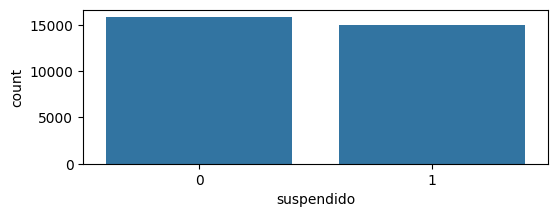

In [51]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.countplot(data=df_students_clean, x='suspendido')
plt.show()

In [52]:
# valores absolutos de cada clase de la target
y_train.value_counts()

,count
suspendido,
0,11135
1,10425


In [53]:
# proporción de cada clase de la target
y_train.value_counts(normalize=True)

,proportion
suspendido,
0,0.516466
1,0.483534


### Balanceado

In [54]:
"""
from imblearn.over_sampling import RandomOverSampler  # Importar RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el oversampler
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Aplicarlo solo al conjunto de entrenamiento
X_train_0_resampled, y_train_0_resampled = oversampler.fit_resample(X_train_0, y_train_0)

# Entrenar un modelo (ejemplo: Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_0_resampled, y_train_0_resampled)

# Hacer predicciones
y_pred_0 = model.predict(X_test_0)

# Evaluar el modelo
print(classification_report(y_test_0, y_pred_0))
"""

"\nfrom imblearn.over_sampling import RandomOverSampler  # Importar RandomOverSampler\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report\n\n# Dividir el dataset en conjunto de entrenamiento y prueba\nX_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Crear el oversampler\noversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)\n\n# Aplicarlo solo al conjunto de entrenamiento\nX_train_0_resampled, y_train_0_resampled = oversampler.fit_resample(X_train_0, y_train_0)\n\n# Entrenar un modelo (ejemplo: Random Forest)\nmodel = RandomForestClassifier(random_state=42)\nmodel.fit(X_train_0_resampled, y_train_0_resampled)\n\n# Hacer predicciones\ny_pred_0 = model.predict(X_test_0)\n\n# Evaluar el modelo\nprint(classification_report(y_test_0, y_pred_0))\n"

In [55]:
# y_train_0.value_counts()

## Estandarización

Guardo las columnas del dataset en una lista antes de estandarizar.

El metodo scaler quita el nombre de las variables


In [56]:
variables_entrenadas = X.columns

## Competición de modelos

In [57]:
modelos = []


# Modelos de reglas
modelos.append(('XGBClassifier', XGBClassifier(random_state=42, verbosity=0)))
modelos.append(('CatBoostClassifier', CatBoostClassifier(verbose=False, random_seed=42)))
modelos.append(('HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=42)))
modelos.append(('LightGBM', LGBMClassifier(random_state=42)))

In [58]:
"""
from sklearn.model_selection import cross_val_score
# Evaluar cada modelo
resultados = []
n_splits = 5  # Número de splits para cross-validation

for nombre, modelo in modelos:
    scores = cross_val_score(modelo, X_train, y_train, cv=n_splits, scoring='accuracy')
    resultados.append((nombre, scores.mean(), scores.std()))

# Crear un DataFrame para mostrar los resultados
resultados_df = pd.DataFrame(resultados, columns=['Modelo', 'Precisión Media', 'Desviación Estándar'])
print(resultados_df)
"""

"\nfrom sklearn.model_selection import cross_val_score\n# Evaluar cada modelo\nresultados = []\nn_splits = 5  # Número de splits para cross-validation\n\nfor nombre, modelo in modelos:\n    scores = cross_val_score(modelo, X_train, y_train, cv=n_splits, scoring='accuracy')\n    resultados.append((nombre, scores.mean(), scores.std()))\n\n# Crear un DataFrame para mostrar los resultados\nresultados_df = pd.DataFrame(resultados, columns=['Modelo', 'Precisión Media', 'Desviación Estándar'])\nprint(resultados_df)\n"

In [59]:
metricas_modelos = pd.DataFrame(columns=['modelo', 'F1'])

# guardar parámetros de cada modelo entrenado para consultarlos más tarde

model_params = {}

for nombre, modelo in modelos:

    # entrenamos el modelo
    modelo.fit(X_train_imputed, y_train)

    # hacemos la predicción sobre el dataset de test
    y_pred = modelo.predict(X_test_imputed)

    # calculamos el F1 Score
    f1 = metrics.f1_score(y_test, y_pred)

    # imprimimos el resultado por modelo
    metricas_modelos = pd.concat([metricas_modelos,
                                  pd.DataFrame({'modelo': nombre, 'F1': f1}, index=[0])
                                  ])



    # guardamos los parámetros de cada modelo
    model_params[nombre] = modelo.get_params()

metricas_modelos.sort_values('F1', ascending=False)

[LightGBM] [Info] Number of positive: 10425, number of negative: 11135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7624
[LightGBM] [Info] Number of data points in the train set: 21560, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483534 -> initscore=-0.065887
[LightGBM] [Info] Start training from score -0.065887


,modelo,F1
0,CatBoostClassifier,0.650589
0,HistGradientBoostingClassifier,0.647952
0,LightGBM,0.643103
0,XGBClassifier,0.634350


Resultado competición de modelos datos rebalanceados, elegimos no rebalancear

In [60]:
"""
from sklearn.metrics import f1_score
# Datos rebalanceados
# Crear una copia de los datos originales
X_train_0 = X_train.copy()
y_train_0 = y_train.copy()

# Crear el undersampler
undersampler = RandomUnderSampler(sampling_strategy=1.0, replacement=False, random_state=42)  # 1.0 = igualar clases

# Aplicarlo solo al conjunto de entrenamiento y crear nuevas variables para los datos rebalanceados
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_0, y_train_0)

# Lista de modelos
modelos = {
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoostClassifier': CatBoostClassifier(verbose=0, random_seed=42),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42, verbosity=0)
}

# Evaluar cada modelo en el conjunto de datos rebalanceado
resultados_rebalanceados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train_balanced, y_train_balanced)  # Entrenar el modelo con datos rebalanceados
    predicciones = modelo.predict(X_test)  # Hacer predicciones en el conjunto de prueba
    f1 = f1_score(y_test, predicciones, average='weighted')  # Calcular F1 Score
    resultados_rebalanceados[nombre] = f1  # Guardar resultados

# Mostrar resultados de la competición con datos rebalanceados
print("Resultados de la competición de modelos (rebalanceados):")
for nombre, f1 in resultados_rebalanceados.items():
    print(f'{nombre}: F1 Score = {f1:.4f}')

"""

'\nfrom sklearn.metrics import f1_score\n# Datos rebalanceados\n# Crear una copia de los datos originales\nX_train_0 = X_train.copy()\ny_train_0 = y_train.copy()\n\n# Crear el undersampler\nundersampler = RandomUnderSampler(sampling_strategy=1.0, replacement=False, random_state=42)  # 1.0 = igualar clases\n\n# Aplicarlo solo al conjunto de entrenamiento y crear nuevas variables para los datos rebalanceados\nX_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_0, y_train_0)\n\n# Lista de modelos\nmodelos = {\n    \'LightGBM\': LGBMClassifier(random_state=42),\n    \'CatBoostClassifier\': CatBoostClassifier(verbose=0, random_seed=42),\n    \'HistGradientBoostingClassifier\': HistGradientBoostingClassifier(random_state=42),\n    \'XGBClassifier\': XGBClassifier(random_state=42, verbosity=0)\n}\n\n# Evaluar cada modelo en el conjunto de datos rebalanceado\nresultados_rebalanceados = {}\nfor nombre, modelo in modelos.items():\n    modelo.fit(X_train_balanced, y_train_balan

# Hiperparametrización

In [61]:
# vemos cuales son los parámetros por defecto con los que se ha entrenado el modelo

print(model_params['XGBClassifier'])

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': 0}


In [62]:
"""
# Definir el modelo
modelo = LGBMClassifier(random_state=42)

# Definir los parámetros a ajustar
parametros = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0]
}

# Configurar GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(estimator=modelo, param_grid=parametros, scoring='accuracy', cv=5)
# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Resultados
mejores_parametros = grid_search.best_params_
print("Mejores parámetros encontrados:")
print(mejores_parametros)
"""

'\n# Definir el modelo\nmodelo = LGBMClassifier(random_state=42)\n\n# Definir los parámetros a ajustar\nparametros = {\n    \'num_leaves\': [31, 50, 100],\n    \'max_depth\': [-1, 10, 20],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'n_estimators\': [100, 200, 300],\n    \'subsample\': [0.6, 0.8, 1.0]\n}\n\n# Configurar GridSearchCV para encontrar los mejores parámetros\ngrid_search = GridSearchCV(estimator=modelo, param_grid=parametros, scoring=\'accuracy\', cv=5)\n# Ajustar el modelo\ngrid_search.fit(X_train, y_train)\n\n# Resultados\nmejores_parametros = grid_search.best_params_\nprint("Mejores parámetros encontrados:")\nprint(mejores_parametros)\n'

In [63]:
"""
# Modificación manual de parámetros
parametros_modificados = {
    'num_leaves': 100,           # Cambia este valor
    'max_depth': -1,            # Cambia este valor
    'learning_rate': 0.001,       # Cambia este valor
    'n_estimators': 300,        # Cambia este valor
    'subsample': 0.8            # Cambia este valor
}


modelo = LGBMClassifier(**parametros_modificados)

# Ajustar el modelo modificado
modelo.fit(X_train, y_train)

# Evaluar el modelo con el conjunto de prueba
y_pred = modelo_modificado.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión en el conjunto de prueba con parámetros modificados: {accuracy}')
"""

"\n# Modificación manual de parámetros\nparametros_modificados = {\n    'num_leaves': 100,           # Cambia este valor\n    'max_depth': -1,            # Cambia este valor\n    'learning_rate': 0.001,       # Cambia este valor\n    'n_estimators': 300,        # Cambia este valor\n    'subsample': 0.8            # Cambia este valor\n}\n\n\nmodelo = LGBMClassifier(**parametros_modificados)\n\n# Ajustar el modelo modificado\nmodelo.fit(X_train, y_train)\n\n# Evaluar el modelo con el conjunto de prueba\ny_pred = modelo_modificado.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint(f'Precisión en el conjunto de prueba con parámetros modificados: {accuracy}')\n"

# Entrenamiento del modelo final

In [64]:
note = input('Escribe una descripción de lo que has probado en esta ejecución:')

Escribe una descripción de lo que has probado en esta ejecución:knn


In [65]:
# import mlflow.sklearn
mlflow.set_experiment("classification_experiment")
mlflow.autolog()



2025/05/27 10:42:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2025/05/27 10:42:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/27 10:42:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/05/27 10:42:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/05/27 10:42:21 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/05/27 10:42:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


In [66]:
with mlflow.start_run():

    mlflow.set_tag("mlflow.note.content", note)

    # Definir el modelo
    # selección del mejor modelo con los mejores parámetros
    modelo =  XGBClassifier(verbose=1, random_seed=42)

    # entrenamiento
    modelo.fit(X_train_imputed, y_train)

    # predict en el dataset de train
    y_train_pred = modelo.predict(X_train_imputed)

    # predict proba en el dataset de train
    y_train_pred_proba = modelo.predict_proba(X_train_imputed)[:, 1]

    # predict en el dataset de test
    y_test_pred = modelo.predict(X_test_imputed)

    # predict proba en el dataset de test
    y_test_pred_proba = modelo.predict_proba(X_test_imputed)[:, 1]

    f1 = f1_score(y_test, y_test_pred, average='weighted') ####

    #mlflow.log_metric("f1_score", f1) ###

    # Optional: log model
    #mlflow.sklearn.log_model(modelo, "model")

NameError: name 'f1_score' is not defined

In [ ]:
# entrenamiento
# modelo.fit(X_train, y_train)

In [ ]:
# predict en el dataset de train
# y_train_pred = modelo.predict(X_train)


In [ ]:
# predict proba en el dataset de train
# y_train_pred_proba = modelo.predict_proba(X_train)[:, 1]

In [ ]:
# predict en el dataset de test
# y_test_pred = modelo.predict(X_test)

In [ ]:
# predict proba en el dataset de test
# y_test_pred_proba = modelo.predict_proba(X_test)[:, 1]

In [ ]:
# y_train_pred

# Evaluación del modelo final

## AUC

#Feature Importance


In [ ]:
import xgboost as xgb

# Entrenar modelo XGBoost Classifier
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_imputed, y_train_imputed)

# Obtener importancias
importances = model.feature_importances_
feature_names = X.columns

# Crear DataFrame ordenado
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar tabla ordenada
print(importance_df)

# Gráfico
plt.figure(figsize=(12, 8))
xgb.plot_importance(model, importance_type='gain', max_num_features=20)
plt.title('Top 20 Feature Importances (XGBoost Classifier)')
plt.show()

In [ ]:
# auc train
auc_train = metrics.roc_auc_score(y_train, y_train_pred_proba)
print('auc train:', round(auc_train,4))

In [ ]:
# auc_test
auc_test = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('auc test:', round(auc_test,4))

### ROC Curve

In [ ]:
# metricas para la curva ROC
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_test_pred_proba)

In [ ]:
#Plot
plt.figure(figsize=[7,5])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Matriz de confusión

In [ ]:
# creamos la matriz de confusión
cm_test = metrics.confusion_matrix(y_test, y_test_pred)

In [ ]:
# gráfico de la matriz de confusión en cantidades
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(colorbar = False, cmap = 'Blues')

plt.title('Confusion Matrix TEST')
plt.plot()

In [ ]:
# gráfico de la matriz de confusión en %
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test))
disp.plot(colorbar = False, cmap = 'Blues')

plt.title('Confusion Matrix TEST (%)')
plt.plot()

## F1_score

In [ ]:
f1_score_sklearn = metrics.f1_score(y_test, y_test_pred)

In [ ]:
print('f1_score:', round(f1_score_sklearn, 4))

In [ ]:
import pickle

# guardamos modelo
pickle.dump(modelo, open('predecir_suspende.p', 'wb')) # esto lo deja guardado temporalmente en colab, a la izquierda, hay que descargarlo

In [ ]:
# creamos un dataframe con los datos de X_test y las variables como columnas (por eso las guardamos antes)
df_X_test = pd.DataFrame(X_test_imputed, columns=variables_entrenadas)
df_X_test.head(5)

In [ ]:
df_students_clean.head()

## Shap Values

In [ ]:
#SHAP value: peso en el output final
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(df_X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, df_X_test, plot_type="bar", max_display=20)

In [ ]:
shap.summary_plot(shap_values, df_X_test)

SHAP + F1_SCORE

In [ ]:
# XGBoost importance (gain)
xgb_importances = model.feature_importances_
feature_names = X.columns

df_xgb_importance = pd.DataFrame({
    'feature': feature_names,
    'gain_importance': xgb_importances
})
df_xgb_importance['gain_rank'] = df_xgb_importance['gain_importance'].rank(ascending=False)

# SHAP importance (mean absolute SHAP value)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_X_test)
shap_mean_abs = np.abs(shap_values).mean(axis=0)

df_shap_importance = pd.DataFrame({
    'feature': df_X_test.columns,
    'shap_importance': shap_mean_abs
})
df_shap_importance['shap_rank'] = df_shap_importance['shap_importance'].rank(ascending=False)

# Merge the two
df_combined = pd.merge(df_xgb_importance, df_shap_importance, on='feature')

# Combined average rank
df_combined['combined_rank'] = (df_combined['gain_rank'] + df_combined['shap_rank']) / 2

# Sort by combined rank
df_combined_sorted = df_combined.sort_values('combined_rank')

# Show top 10 combined features
top_features = df_combined_sorted.head(10)
print("Top 10 combined features (XGBoost gain + SHAP importance):")
print(top_features[['feature', 'gain_importance', 'shap_importance', 'combined_rank']])

# Optional: plot combined importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['combined_rank'])
plt.xlabel('Combined Average Rank')
plt.title('Top 10 Features by Combined Importance (XGBoost + SHAP)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar importancia para visualización
max_rank = df_combined_sorted['combined_rank'].max()
df_combined_sorted['importance_score'] = max_rank + 1 - df_combined_sorted['combined_rank']

# Tomar top 10
top_features = df_combined_sorted.sort_values('importance_score', ascending=False).head(10)

# Set estilo bonito
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# Crear gráfico
ax = sns.barplot(
    x='importance_score',
    y='feature',
    data=top_features,
    palette='coolwarm'
)

# Agregar etiquetas al final de cada barra
for i, (value, feature) in enumerate(zip(top_features['importance_score'], top_features['feature'])):
    ax.text(value + 0.1, i, f'{value:.1f}', color='black', va='center', fontsize=12, fontweight='bold')

# Títulos y etiquetas
plt.xlabel('Combined Importance Score (Inverted Rank)', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('⭐ Top 10 Most Important Features (XGBoost + SHAP Combined) ⭐', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

### Interpretabilidad top 5 variables

In [ ]:
# Poner aca una explicación de estas variables

#Predict-Proba

In [ ]:
# Obtener las probabilidades de reprobar (clase 1)
proba_reprobar = model.predict_proba(X_test_imputed)[:, 1]

# Crear DataFrame con índices (IDs) de los estudiantes y su probabilidad
df_riesgo = pd.DataFrame({
    'student_id': X_test_imputed.index,  # si tienes un índice identificador; si no, usa un campo específico
    'probabilidad_reprobar': proba_reprobar
})

# Ordenar de mayor a menor riesgo
df_top20 = df_riesgo.sort_values(by='probabilidad_reprobar', ascending=False).head(40)

print("🎯 Top 40 estudiantes más propensos a reprobar:")
print(df_top20)

# MLFlow Final Logging and Download Results

In [ ]:

# mlflow.log_metric("auc_test", auc_test)
# mlflow.log_metric('f1_score', f1)



In [ ]:
# import shutil

# shutil.make_archive('/content/mlruns_archive', 'zip', '/content/mlflow')

mlflow.end_run()